## Ejercicios tema 3

Blanca Cano Camarero 

### Comentarios iniciales

A continuación verá los `import` a partir del comentario `## ficheros propios` encontrará que ese fichero se genera en el propio archivo de jupyter usando la orden del sistema `file`.

Aclaración sobre nombre: con frecuencia verá que a la hora de denominar a las funciones que implementan los método aparecen partículas en los nombres como `succ`  y `completo`; `succ` hace referencia a la idea de `successor`, es decir que su salida será el elemento siguiente de la sucesión de aproximaciones, en nuestro caso el valor $x_{n+1}$. La pártícula `completo` informa de que esos método devolverá dos arrays de numpy, uno con los nodos y otro con las aproximaciones en dichos nodo. 

En esta práctica el algoritmo del que más *orgullosa* estoy es el de Taylor, échele un vistazo cuidado, ya que ha supuesto una mejora considerable con el dado en el guión de prácticas; se ha buscado la máxima abstración y flexibilidad con el resultado de que todos los casos planteables son resueltos por una sola función; véase fichero `super_Taylor.py`.

Encontrará también en este ficher ejercicios de la relación de teoría, ya que se prestaban mucho a hacerse con el ordenador. 

Al final del fichero hay un apéncide con funciones usadas para ahorrarse escribir código redundate, relacionado con la representación gráfica y comparativa de soluciones y métodos. 

Como humilde comentario informático por lo visto en el guión en esta (y en otras) entregas, personalemente ha prescindido de definir funciones auxiliares de contenido constante dentro de otras que se llaman con frecuencia, ya que no considero que sea una práctica recomendable en cuando a nivel de eficiencia. Si se escriben fuera de la función y dentro del módulo a efectos prácticos es igual y lo que más nos importa, solo se define una vez, de la otra manera se crea y *destruye* cada vez que se llame a la función (pongo *destruye* porque esos objetos generados no *desaparecen* inminentemente, persistirán en memoria hasta que el recolector de basura los *elimine*. 


Finalmente me gustaría advertile y pedirle perdón por no haber sido consistente con cierta notación, ya que se va a utilizar indistintamente $(t,x)$ y $(x,y)$ aunque predominal el último caso; audentro de un mismo módulo siempre se será consistente con la notación. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from time import time # para medir tiempos de cálculo 

## ficheros propios 
import fast_graph  # dibujo de gráficos para comparar soluciones 
import punto_medio
import heun
import eulerexplicito 
import super_Taylor
import butcher
import mml    # método basados en cuadraturas

## Ejercicio 1

1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional. 

La estabilidad es un concepto teórico para analizar la convergencia práctica, por tanto los métodos de su análisis que se han seguido en este ejercicio para analizarla y en todos en los que se vuelva es numéricos o con representaciones.

[10, 100, 1000]
Para N=10 se ha tardado 0.00022840499877929688
Donde el error máximo es 0.124539368359045
Para N=100 se ha tardado 0.00024962425231933594
Donde el error máximo es 0.013467999037519274
Para N=1000 se ha tardado 0.0013110637664794922
Donde el error máximo es 0.0013578962231490799


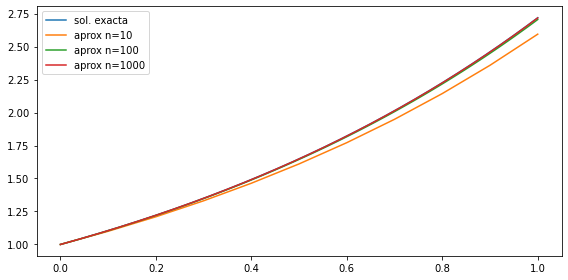

In [2]:
## Datos del problema
### función
def f(t,z):
    return z

### intervalo 
a = 0; b= 1
### condición inical del PVI (y(a) = 1)
ya = 1

### solución exacta (para comparar)
def sol(y):
    return np.exp(y)


#import eulerexplicito  # método de euler explítico 
 
#from time import time # para medir tiempos de cálculo 

## recorremos partiendo de n= 10 de 30 en 30 
xn = list() #nodos solución
yn = list() # valor de los nodos 
N = [10**i for i in range(1,4)]
print (N)
for n in N:
    tiempo_inicial = time()
    xx, yEulerexpl = eulerexplicito.integrate(f,a,ya,b,n)
    tiempo_final = time()
    
    ## almacenamso solución 
    xn.append(xx) 
    yn.append(yEulerexpl)
    
    print(f'Para N={n} se ha tardado {tiempo_final - tiempo_inicial}')
    #print(f'Donde la media de error es { np.mean(abs(sol(xx)-yEulerexpl))}')
    print(f'Donde el error máximo es { abs(sol(xx)-yEulerexpl).max()}')
    

## REPRESENTACIÓN DE LA SOLUCIÓN 
xx = np.linspace(a,b,N[-1])
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx, sol(xx), label="sol. exacta")
for i in range(len(yn)):
    ax.plot(xn[i],yn[i], label=f'aprox n={N[i]}')
    

ax.legend()
fig.tight_layout()
graf_Eulerexplicito = fig


1. A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [7]:
%%file punto_medio.py
"""
    MÉTODO PUNTO MEDIO O EULER MEJORADO 
    __ funciones__ 
    complete_integrate: devuelve soluciones de nodos y soluciones
    succ_integrate: dado un nodo devuelve la siguiente solución 
     
    __ significado variables __ 
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
"""
import numpy as np
def succ_euler(F, x,y,h):
    '''método de euler explícito 
    F (x,y) función derivada
    x, y valores de los que se parte
    incremento
    Salida : y_{n+1}
    '''
    return y + h* F(x,y)

def succ_integrate(F,x,y,h):
    '''PUNTO MEDIO siguiente solución
    '''
    return y + h*F(x+h/2, succ_euler(F,x,y,h/2))

def complete_integrate(F,x0, y0,xfinal, N ):
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal - x0)/N
    
    for n in range(N):
        Y.append(succ_integrate(F,X[n],Y[n],h))
    return X,Y



Overwriting punto_medio.py


In [ ]:
from punto_medio import succ_euler



In [8]:
%%file heun.py 
'''
FÓRMULA DE HEUN O EULER MEJORADO 
(Idea utilizar integración del trapecio)
'''

import numpy as np

def succ_integrate(F,x,y,h):
    '''método de de euler mejorado 
    F (x,y) función derivada
    x, y valores de los que se parte
    h:incremento
    Salida : y_{n+1}
    '''
    return y + h/2*(F(x,y) + F(x+h, y + h*F(x,y) ) )


def complete_integrate(F,x0, y0,xfinal, N ):
    '''método de de euler mejorado 
    F (x,y) función derivada
    x, y valores de los que se parte
    N: número de intervalos 
    Salida : vector de nodos, vector de soluciones apriximadas a esos nodos
    '''
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal - x0)/N
    
    for n in range(N):
        Y.append(succ_integrate(F,X[n],Y[n],h))
    return X,Y




Writing heun.py


El siguiente nodo es 0.39950010415798654


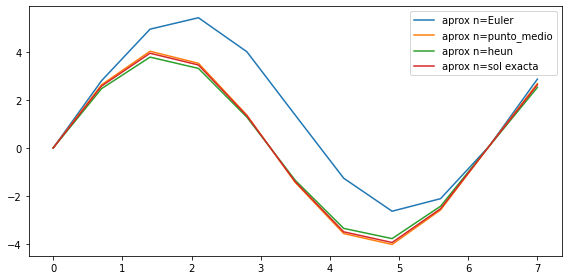

In [14]:
#mostramos su uso 

#comento estos import porque en nuestro caso ya se llaman al comienzo del fichero
#import punto_medio
#import heun

## Definimos PVI
def f2(x,y):
    return 4*np.cos(x)
x0 = 0
y0 = 0
h = 1/10
N = 10
xfinal = 7

## solución  aproximada 
sol_aprox = punto_medio.succ_integrate(f2,x0,y0,h)
print(f'El siguiente nodo es {sol_aprox}')

## varios nodo
### _ Euler
xx, yEuler = eulerexplicito.integrate(f2,x0,y0,xfinal,N)
### punto medio 
x_pnt_medio, sol_pnt_medio = punto_medio.complete_integrate(f2,x0,y0,xfinal,N)
### heun
x_heun, sol_heun = heun.complete_integrate(f2,x0,y0,xfinal,N)

### solucion_real
def sol_f2(x):
    return 4*np.sin(x)
    

## gráfica
nodos = [xx,x_pnt_medio, x_heun,xx]
soluciones = [yEuler, sol_pnt_medio, sol_heun,sol_f2(xx)]
etiquetas = ['Euler','punto_medio', 'heun', 'sol exacta']
graph = fast_graph.multiple_draw(nodos,soluciones,etiquetas)


# Método de Taylor 

Comienzo mostrando mi versión implementada, se ha buscado la abstracción máxima, es decir
solo hay que indicar el orden hasta que se desea desarrollar el polinomio de Taylor y los 
valores iniciales mínimos.

Siguiendo el patrón seguido en los método anteriores, nuestras funciones implementadas son:
- `succ_taylor(F,x,y,h, p = 1)` para un término concreto.
- `complete_taylor(F, x0, y0, xfinal, N, p= 1)` para nodos equiespaciados y el valor del método en estos. 


In [41]:
%%file super_Taylor.py 
'''
FORMULA DE INTEGRACIÓN Y DERIVACIÓN DE TAYLOR

Ejemplo de ejecución: 
def f3(x,y):
    return sp.exp(3*x)

succ_taylor(f3,0,1,1/10, 2) # devolverá el resultado de ejecutar el métood de Taylor
complete_taylor(f3,0,1,1,10)    # nodos y su valor en el los distintos nodos
'''

import numpy as np
import sympy as sp

t,z = sp.symbols('t,z')

def fact(x):
    ''' factorial
    '''
    r = 1
    for i in range(2,x):
        r = r*i
    return r


def _diff(F,orden=1):
    '''CALCULA DERIVADA
    F(x,y(x)) (en función de sympy)
    orden es el número de derivada 
    '''
    def F_aux(x,y):
            return sp.diff(F(t,z),t).subs({t:x,z:y})  + sp.diff(F(t,z),z).subs({t:x,z:y}) * F(t,z).subs({t:x,z:y}) 
        
    if orden>1: 
        F_aux= _diff(F_aux, orden-1)
        
    return F_aux

def serieTaylor(y0,F,h, orden = 1, ordenAcumulado=1, T = None,):
    '''Devuelve serie de teylor de centrada en y0
    y0: es el valor primero 
    F(x,y) es el valor de la derivada, aceptable por sympys
    
    Los parámetro ordenAcumulado y T NO SE TOCAN (son auxiliares a la función)
    '''
    
    if ordenAcumulado == 1:
        df = F
        def ret(x,y):
            return y0 + h*F(x,y)
    else:
        df = _diff(T)
        
        def ret(x,y):
            return F(x,y) + df(x,y)*h**ordenAcumulado/fact(ordenAcumulado)
        
    if orden == ordenAcumulado:
        return ret
    else:
        return serieTaylor(y0, ret, h, orden, (ordenAcumulado+1), df)
        
    
def succ_taylor(F,x,y,h, p = 1):
    '''Método de taylor, devuelve 
    y_{n+1} 
    calculado por el método de taylor 
    y_{n+1} = y_n + \sum_{i = 1} ^p \frac{h^i}{i!} derivada_orden_i(y_n)
    ''' 
    taylorcillo = serieTaylor(y,F,h,p)
    return taylorcillo(x,y)


def complete_taylor(F, x0, y0, xfinal, N, p= 1):
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal - x0)/N
    
    # Calculamos la aproximación 
    taylorcillo = succ_taylor(F,t,z,h, p)

    for n in range(N):
        Y.append(taylorcillo.subs({t:X[n],z:Y[n]}) )
    return X,Y

Overwriting super_Taylor.py


# Ejercicios Taylor

**Ejercicios:**
1. Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.
 
1. A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

Este segundo ya está resuelto no solo para el caso concreto $p=3$ sino para cualquier $p>0$ :)

In [77]:

import numpy as np
import sympy as sp

t,z = sp.symbols('t,z')

def fact(x):
    ''' factorial
    '''
    r = 1
    for i in range(2,x):
        r = r*i
    return r


def _diff(F,orden=1):
    '''CALCULA DERIVADA
    F(x,y(x)) (en función de sympy)
    orden es el número de derivada 
    '''
    def F_aux(x,y):
            return sp.diff(F(t,z),t).subs({t:x,z:y})  + sp.diff(F(t,z),z).subs({t:x,z:y}) * F(t,z).subs({t:x,z:y}) 
        
    if orden>1: 
        F_aux= _diff(F_aux, orden-1)
        
    return F_aux

def serieTaylor(y0,F,h, orden = 1, ordenAcumulado=1, T = None,):
    '''Devuelve serie de teylor de centrada en y0
    y0: es el valor primero 
    F(x,y) es el valor de la derivada, aceptable por sympys
    
    Los parámetro ordenAcumulado y T NO SE TOCAN (son auxiliares a la función)
    '''

    if ordenAcumulado == 1:
        df = F
        def ret(x,y):
            return y0 + h*F(x,y)
    else:
        df = _diff(T)
        
        def ret(x,y):
            return F(x,y) + df(x,y)*h**ordenAcumulado/fact(ordenAcumulado)
        print('entra',ret(t,z))
        
    if orden == ordenAcumulado:
        return ret
    else:
        return serieTaylor(y0, ret, h, orden, (ordenAcumulado+1), df)
        
    
def succ_taylor(F,x,y,h, p = 1):
    '''Método de taylor, devuelve 
    y_{n+1} 
    calculado por el método de taylor 
    y_{n+1} = y_n + \sum_{i = 1} ^p \frac{h^i}{i!} derivada_orden_i(y_n)
    ''' 
    taylorcillo = serieTaylor(y,F,h,p)
    return taylorcillo(x,y)


def complete_taylor(F, x0, y0, xfinal, N, p= 1):
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal - x0)/N
    
    # Calculamos la aproximación 
    taylorcillo = succ_taylor(F,t,z,h, p)

    for n in range(N):
        Y.append(taylorcillo.subs({t:X[n],z:Y[n]}) )
    return X,Y

In [67]:
## Definimos PVI
def f2(x,y):
    return 4*np.cos(x)
def sp_f2(x,y):
    return 4*sp.cos(x)



In [64]:
print ('COMPARATIVAS CON N')
## recorremos partiendo de n= 10 de 30 en 30 
xn = list() #nodos solución
yn = list() # valor de los nodos 
N = [10**i for i in range(1,4)]
print (N)

for p in range(2,5):
    print(f'_____ orden {p}_____-')
    for n in N:
        tiempo_inicial = time()
        xx, yy= super_Taylor.complete_taylor(sp_f2,x0,y0,xfinal,n,p)
        tiempo_final = time()
    
        ## almacenamso solución 
        xn.append(xx) 
        yn.append(yy)
    
        print(f'Para N={n} se ha tardado {tiempo_final - tiempo_inicial}')
    #print(f'Donde la media de error es { np.mean(abs(sol(xx)-yEulerexpl))}')
        print(f'Donde el error máximo es { abs(sol_f2(xx)-yy).max()}')
    

COMPARATIVAS CON N
[10, 100, 1000]
_____ orden 2_____-
Para N=10 se ha tardado 0.0271151065826416
Donde el error máximo es 2.77380788217674
Para N=100 se ha tardado 0.15781331062316895
Donde el error máximo es 0.279981206857724
Para N=1000 se ha tardado 1.833040714263916
Donde el error máximo es 0.0279999631475431
_____ orden 3_____-
Para N=10 se ha tardado 0.018686294555664062
Donde el error máximo es 3.20304883813225
Para N=100 se ha tardado 0.14974737167358398
Donde el error máximo es 0.280438659448417
Para N=1000 se ha tardado 1.8426401615142822
Donde el error máximo es 0.0280004204824455
_____ orden 4_____-
Para N=10 se ha tardado 0.028788089752197266
Donde el error máximo es 2.80402236092665
Para N=100 se ha tardado 0.1630408763885498
Donde el error máximo es 0.279981453666909
Para N=1000 se ha tardado 1.8347203731536865
Donde el error máximo es 0.0279999631500837


### Comparativas con otros métodos 
#### Euler explícito
Sabemos que para $p=1$ coincide con el método de Euler explícito así que no lo vamos a comprobar.

#### Punto medio y Heun
Sabemos que ambos son de orden 2, así que comparémoslo con con $p=2$ y $p=3$

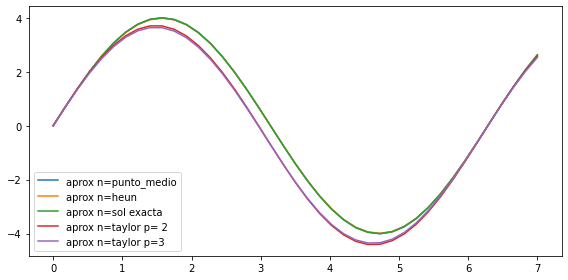

In [88]:
x0 = 0
y0 = 0
h = 1/10
N = 40
xfinal = 7

## varios nodo

### punto medio 
x_pnt_medio, sol_pnt_medio = punto_medio.complete_integrate(f2,x0,y0,xfinal,N)
### heun
x_heun, sol_heun = heun.complete_integrate(f2,x0,y0,xfinal,N)

### taylor super_Taylor.
x_taylor_1, sol_taylor_1 = super_Taylor.complete_taylor(sp_f2,x0,y0,xfinal,N,2)
x_taylor_2, sol_taylor_2 = super_Taylor.complete_taylor(sp_f2,x0,y0,xfinal,N,3)
### solucion_real
def sol_f2(x):
    return 4*np.sin(x)
   
## gráfica
nodos = [x_pnt_medio, x_heun,x_pnt_medio,x_taylor_1, x_taylor_2]
soluciones = [sol_pnt_medio, sol_heun,sol_f2(x_pnt_medio),sol_taylor_1, sol_taylor_2]
etiquetas = ['punto_medio', 'heun', 'sol exacta', 'taylor p= 2 ', 'taylor p=3']
graph = fast_graph.multiple_draw(nodos,soluciones,etiquetas)



# Métodos de Runge-Kutta
**Ejercicios:**
1. Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional 
1. A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher.

El ejercicio 2 queda implementado en `butcher.py` cuyo código aparece a continuación. 

In [5]:
%%file butcher.py
'''
Método de Butcher 
y algunos implemetados a partir de él: 
RK4: runge-kuta clásico 
RK2, con alfa beta parámetros
'''

import sympy as sp
import numpy as np

def succ_butcher(F,x,y,a,b,h):
    '''
    f derivada
    y(x) = y que es el valor inicial 
    h = variación
    a,b son coeficiente del arreglo de butcher
    | c_1 | a11 a12 ...a1n
    | c_2 | a21 a22 ...a2n
             ...
    | c_n | an1 an2 ...ann
    ------------------------
          | b1   b2 ... bn
          
    y representa 
    
    x_{n+1} = x_n + h \sum_{j=1}^n b_j K_j(t_n, x_n)
    k_i(t,x) = f(t+c_i h, x+ h \sum_{j=1}^n a_{ij} k_j(t,x))
          
    '''
    n=len(b)
    c = [ sum(a[i]) for i in range(n)]
    K = sp.symbols('k0:'+str(n))
    
    def fk(f,i,t,x,h):
        '''Representa K_i(t,x) = f(t+c_ih, sum a K_j) )
        '''
        return f( t+c[i]*h, x+h*sum(
        [ a[i][j]*K[j] for j in range(n)]) )

    l=[ - K[i] + fk(F,i,x,y,h)    for i in range(n)]
    
    sk =sp.solve(l, K)

    
    def solk(K, sk):
        '''Solve puede que no nos devuelva todas las soluciones si son 0'''
        l = [j for j in range(n)]
        for i in range(n):
            if K[i] in sk:
                l[i] = sk[K[i]]
            else:
                l[i] =0
        return l

    sk =solk(K,sk)
    
    return y + h*sum([ b[i]*sk[i] for i in range(n)] ) 
    
  
def complete_butcher(F, x0, y0,xfinal, N, a, b):
    '''
    F función
    x,y condiciones iniciales y(x_0) = y_0
    xfinal = valor final hasta el que calcular
    N número de intervalos 
    '''
    t,z = sp.symbols('t z')
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal - x0)/N
    
    # Calculamos la aproximación 
    rk= succ_butcher(F,t,z,a,b,h)

    for n in range(N):
        Y.append(rk.subs({t:X[n],z:Y[n]}) )
    return X,Y

def succ_RK4(f,x, y, h):
    n=4
    a = [[0,0,0,0],
         [1/2,0,0,0],
         [0,1/2,0,0],
         [0,0,1,0]
        ]
    
    b = [1/6,1/3,1/3,1/6]
    
    return succ_butcher(f,x,y,a,b,h)

def succ_RK2(f,x,y,h, alpha=1, beta=1/2):
    '''
    Recordemos que es óptimo en alpha*beta = 1/2
    - Si alpha = 1, beta = 1/2: método Punto medio
    - Si alpha 1/2, beta = 1: Heun (trapecio)
    '''
    n=2
    a = [
        [0,0],
        [beta, 0]
    ]
    b = [1-alpha, alpha]
    
    return succ_butcher(f,x,y,a,b,h)




def complete_RK2(F, x0, y0, xfinal, N, alpha=1, beta=1/2):
    n=2
    a = [
        [0,0],
        [beta, 0]
    ]
    b = [1-alpha, alpha]
    return complete_butcher(F, x0, y0, xfinal, N, a, b)
    
def complete_RK4(F, x0, y0, xfinal, N):
    '''
    F función
    x,y condiciones iniciales y(x_0) = y_0
    xfinal = valor final hasta el que calcular
    N número de intervalos 
    '''
    t,z = sp.symbols('t z')
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]
    h = (xfinal - x0)/N
    
    # Calculamos la aproximación 
    rk4= succ_RK4(F,t,z,h)

    for n in range(N):
        Y.append(rk4.subs({t:X[n],z:Y[n]}) )
    return X,Y

Overwriting butcher.py


In [2]:
#Ejemplo para comprobar que está bien programado 
def f(x,y):
    return x**2*y

x = 0
y = 2
h = 0.2

print('Mi RK4 ',butcher.succ_RK4(f,x,y,h))

import RK4  # módulo del profesor
print(f'RK4 profesor {RK4.integrate(f,x,y,h,1)}')
print('Mi RK2 ',butcher.succ_RK2(f,x,y,h))
print(f'punto medio {punto_medio.succ_integrate(f,x,y,h)}')

print(f'todas las soluciones {butcher.complete_RK2(f, x, y, 0.2, 4)}')



Mi RK4  2.00534000533333
RK4 profesor (array([0. , 0.2]), array([2.        , 2.00534001]))
Mi RK2  2.00400000000000
punto medio 2.004
todas las soluciones (array([0.  , 0.05, 0.1 , 0.15, 0.2 ]), [2, 2.00006250000000, 2.00062505273547, 2.00218843180500, 2.00525600738241])


In [13]:
## EJERCICIO 1 Comparativa  

def f2(x,y):
    return 4*np.cos(x)

x0 = 0
y0 = 0
h = 1/10
N = 40
xfinal = 7

def sol_f2(x):
    return 4*np.sin(x)

comparativaN(butcher.complete_RK4, f2, x0, y0,xfinal, [10, 30, 50], sol_f2 )


Para N=10 se ha tardado 0.43708086013793945
Donde el error máximo es 3.94179891995384
Para N=30 se ha tardado 1.1345677375793457
Donde el error máximo es 3.99581966839171
Para N=50 se ha tardado 0.8995344638824463
Donde el error máximo es 3.99810332242192


## MML basados en cuadraturas

**Ejercicios:**
1. A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.

In [24]:
%%file mml.py
'''
MML BASADOS EN CUADRATURA

Aunque las abreviaturas las carga el diablo, 
las utilizadas aquí son: 

AM

Nota: En algunos casos la variabel k es superflua, se ha añadido para que la cabecera 
tenga el mismo formato y sea totalmente versatil :)
'''
import numpy as np
from eulerexplrapido import integrate as euler 

def succ_AB (F, B,t, X,h,k=None):
    '''ADAMS-BASHFORTH
    F derivada
    B vectori coeficientes del métdodo (de aquí se obtiene la k)
    h diferencia
    matriz de X anteriores
    ojo se está usando notación (t,x)
    ''' 
    return X[-1] + h* sum([B[i]*F(t+h*i, X[i]) for i in range(len(B))])

def complete_AB(F,x0,y0,xfinal,N, beta, m_inicial=euler):
    '''
    ojo se está usando notación (x,y)
    '''
    k = len(beta)
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    
    #calculamos primeras aprox con m_inicial 
    for i in range(k-1):
        Y.append(m_inicial(F,X0[i],Y[-1], h))

    for n in range(N-1):
        Y.append(succ_AB(F,B,X[n],Y[-k:], h,k))
                                
    return np.array(X),np.array(Y)


def succ_AM (F, B,t, X,h,k=None):
    '''
    F derivada
    B vectori coeficientes del métdodo (de aquí se obtiene la k)
    h diferencia
    matriz de X anteriores
    ojo se está usando notación (t,x)
    ''' 
    return X[-2] + h* sum([B[i]*F(t+h*i, X[i]) for i in range(len(B))])

def complete_AM(F,x0,y0,xfinal,N, beta, m_inicial, k=None):
    '''
    ojo se está usando notación (x,y)
    '''
    if(k==None):
        k = len(beta)
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    
    #calculamos primeras aprox con m_inicial 
    for i in range(k-1):
        Y.append(m_inicial(F,X0[i],Y[-1], h))

    for n in range(N-1):
        Y.append(succ_AM(F,B,X[n],Y[n],X[-k:], h,k))
                                
    return np.array(X),np.array(Y)

def succ_MS (F, B,t, X,h,k=None):
    '''
    Milne-simpson
    F derivada
    B vectori coeficientes del métdodo (de aquí se obtiene la k)
    h diferencia
    matriz de X anteriores
    ''' 
    return X[-3] + h* sum([B[i]*F(t+h*i, X[i]) for i in range(len(B))])

def complete_MS(F,x0,y0,xfinal,N, beta, m_inicial):
    k = len(beta)
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    
    #calculamos primeras aprox con m_inicial 
    for i in range(k-1):
        Y.append(m_inicial(F,X0[i],Y[-1], h))

    for n in range(N-1):
        Y.append(succ_MS(F,B,X[n],Y[n],X[n:], h))
                                
    return np.array(X),np.array(Y)

def succ_Nystrom (F, B,t, X, h, k):
    '''
    METODO NYSTROM
    F derivada
    B vectori coeficientes del métdodo va hasta la k-r
    h diferencia
    matriz de X anteriores
    ''' 
    return X[k-3] + h* sum([B[i]*F(t+h*i, X[i]) for i in range(len(B))])

def complete_Nystrom(F,k,x0,y0,xfinal,N, beta, m_inicial):
    k = len(beta)
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    
    #calculamos primeras aprox con m_inicial 
    for i in range(k-1):
        Y.append(m_inicial(F,X0[i],Y[-1], h))

    for n in range(N-1):
        Y.append(succ_Nystrom(F,B,X[n],Y[n],X[n:], h,k))
                                
    return np.array(X),np.array(Y)

## Metodos para calcular alphas y betas con el mayor orden posible 
## Basado en la teoría de que tendrá orden p si pata todo i \in {0..p} Ci = 0 y C_{p+1} \neq 0
def fact(n):
    if n == 0:
        return 1
    else:
        return n* fact(n-1)
    
def C(i, A, B, k):
    '''
    X_{n+k} = \sum a_i x_{n+i} + h\sum b_i f_i 
    A = [a_0, ...a_{k-1}]
    B = [b_0,... b_{k}]
    '''
    if (i==0):
        return 1 - sum(A)
    else:
        f = fact(i-1)
        return k**i/(f*i) - sum( [ j**k/(f*i)*A[j] for j in range(1,len(A))]) - sum( [ j**(k-1)/f *B[j] for j in range(1,len(B))])

Overwriting mml.py


## Ejercicio 12 relación de problemas

Ejercicio 12 de la relación de teoría. 
Y de paso ejemplificamos el funcionamiento del programa anterior. 

Podemos observar que es de orden 2, ya que para p=3 el sistema que debería resolver es incompatible. 

Además el teorema de Dalquist nos dice que es concergente y alcanza orden máximo. 



In [48]:
a,b = sp.symbols('a b')
A = [-a, 1+a]
B = [a, -(a+b+a*b), (1+b)]
l = [C(i,A,B,2) for i in range(3)]

print(f'Solución para p=2 {sp.solve(l,a,b)}') 

l = [C(i,A,B,2) for i in range(4)]
print(f'Solución para p=3 {sp.solve(l,a,b)}')

[(-1.00000000000000, -0.500000000000000)]

## Métodos Predictor-Corrector

### Método de Adams-Bashforth-Moulton de orden 5
Implementaremos a continuación un método MML Predictor-Corrector particular, combinando un predictor AB de 5 pasos con un corrector AM de 4, y aplicadon una sólo corrección en cada iteración:

P: $y_{n+5}^{(0)} = y_{n+4} + \frac{h}{720} (1901 f_{n+4} -2774 f_{n+3} +2616 f_{n+2} - 1274 f_{n+1} + 251 f_n)$

C$^1$: $y_{n+5} = y_{n+4} + \frac{h}{720} (251 f(t_{n+5},y_{n+5}^{(0)}) + 646 f_{n+4} -264 f_{n+3} +106 f_{n+2} - 19 f_{n+1}$ 

In [59]:
%%file predictor_corrector.py

from eulerexplrapido import integrate as euler 
import numpy as np

def pc(metodo_predictor,F, Bp,x0, y0,xfinal, metodo_corrector,Bc,N,metodo_inicial=euler, num_correciones =1):

    
    k = len(Bp)
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    
    #calculamos primeras aprox con m_inicial 
    for i in range(k-1):
        Y.append(m_inicial(F,X0[i],Y[-1], h))

    for n in range(N-1):
        ys = metodo_predictor(F,Bp,X[n],Y[-k:], h,k)
        
        for i in range(1,num_correcciones):
            ys = metodo_corrector(F,Bc,X[n],X[-k:]+[ys], h,(k+1))
        
        Y.append(metodo_corrector(F,Bc,X[n],X[-k:]+[ys], h,(k+1)))
                    
    
    return np.array(X),np.array(Y)

    
    
    
    

Overwriting predictor_corrector.py


In [64]:
# import mml 

from importlib import reload  
import predictor_corrector

reload(mml)
BP =  list(map((lambda x: x/720), [251, -1274, 2616,-2774,1901]))    
BC = list (map((lambda x: x/720), [-19,   106,-264,646,251]))

# Para que funcione darle valores más allá de los simbólicos
t0,x0, xfinal, N = sp.symbols('t0 x0 xe N')
f = sp.Function('f')(t0,x0)
t0 = 0; x0 = 1; xfinal = 1; N = 10 
def f(x,y):
    return x
predictor_corrector.pc(f,mml.succ_AB,BP, t0,x0, xfinal, mml.succ_AB, BC,10)


AttributeError: module 'predictor_corrector' has no attribute 'pc'

In [20]:
 list(map((lambda x: 2*x), [1,2]))

[2, 4]

# Funciones extras pa trabajar más rápido 



In [15]:
%%file fast_graph.py
'''PINTA GRÁFICAS RÁPIDO 
    xx = array numpy con nodos
    yy = valores de esos nodos 
'''
import matplotlib.pyplot as plt

def draw_one(xx,yy,my_label='aprox'):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(xx, yy, label=my_label)   
    ax.legend()
    fig.tight_layout()
    return fig

def multiple_draw(vx,vy,vlabel):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    for i in range(len(vy)):
        ax.plot(vx[i],vy[i], label=f'aprox n={vlabel[i]}')
    
    ax.legend()
    fig.tight_layout()
    return fig
 

Overwriting fast_graph.py


In [20]:
from time import time  # para medir tiempos de cálculo 

def comparativaN(f_metodo, F, x, y,xfinal,  N = [10**i for i in range(1,4)], sol = False):
    '''
    Función para comparar tiempo en función de N
    f
    '''
## recorremos partiendo de n= 10 de 30 en 30 
    xn = list() #nodos solución
    yn = list() # valor de los nodos 
   
   
    for n in N:
        tiempo_inicial = time()
        xx, yy = f_metodo(f,x,y,xfinal, n)
        tiempo_final = time()
    
    ## almacenamso solución 
        xn.append(xx) 
        yn.append(yy)
    ## mostramos resultados en pantalla 
        print(f'Para N={n} se ha tardado {tiempo_final - tiempo_inicial}')
        #print(f'Donde la media de error es { np.mean(abs(sol(xx)-yEulerexpl))}')
        print(f'Donde el error máximo es { abs(sol(xx)-yy).max()}')
    

1